## Loading DEA data

#### In this tutorial we look at the different ways of loading data and constructing queries for the DEA collections.
#### Let's start by loading the libraries and creating the Datacube object to work with DEA:

In [1]:
import datacube
from check_answer import check_answer
from odc.ui import with_ui_cbk

dc = datacube.Datacube(app="loading_data")

#### As we have previously seen, the `dc.load()` function returns a XArray Dataset object containing the results of our query. This query should specify the collection, temporal and spatial extents that we want.

#### The `dc.load()` function requires the following minimum arguments:

* `product`: The data product to load (from `list_products()` function).
* `x`: The spatial region in the *x* dimension. By default, the *x* and *y* arguments accept queries in a geographical co-ordinate system WGS84, identified by the EPSG code *4326*.
* `y`: The spatial region in the *y* dimension. The dimensions ``longitude``/``latitude`` and ``x``/``y`` can be used interchangeably.
* `time`: The temporal extent. The time dimension can be specified using a tuple of datetime objects or strings in the "YYYY", "YYYY-MM" or "YYYY-MM-DD" format. 

#### For example, to load 2015 data from the [Landsat 8 NBAR-T annual geomedian product](https://explorer.sandbox.dea.ga.gov.au/ls8_nbart_geomedian_annual) for Moreton Bay in southern Queensland, use the following parameters:

* `product`: `ls8_nbart_geomedian_annual`
* `x`: `(153.3, 153.4)`
* `y`: `(-27.5, -27.6)`
* `time`: `("2015-01-01", "2015-12-31")`

#### Run the following cell to load all datasets from the `ls8_nbart_geomedian_annual` product that match this spatial and temporal extent:

In [44]:
ds = dc.load(product="ga_ls8c_nbart_gm_cyear_3",
             x=(153.3333),
             y=(-27.5),
             time=("2015-01-01", "2015-12-31"))

ds

<xarray.Dataset>
Dimensions:      (time: 1, y: 1, x: 1)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02T11:59:59.999999
  * y            (y) float64 -3.156e+06
  * x            (x) float64 2.073e+06
    spatial_ref  int32 3577
Data variables:
    blue         (time, y, x) int16 589
    green        (time, y, x) int16 800
    red          (time, y, x) int16 595
    nir          (time, y, x) int16 196
    swir1        (time, y, x) int16 106
    swir2        (time, y, x) int16 71
    sdev         (time, y, x) float32 0.01371
    edev         (time, y, x) float32 386.0
    bcdev        (time, y, x) float32 0.1525
    count        (time, y, x) int16 15
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

#### The variable `ds` has returned an `xarray.Dataset` containing all data that matched the spatial and temporal query parameters inputted into `dc.load`.

*Dimensions* 

* This header identifies the number of timesteps returned in the search (`time: 1`) as well as the number of pixels in the `x` and `y` directions of the data query.

*Coordinates* 

* `time` identifies the date attributed to each returned timestep.
* `x` and `y` are the coordinates for each pixel within the spatial bounds of the query.

*Data variables*

* These are the measurements available for the nominated product. 
For every date (`time`) returned by the query, the measured value at each pixel (`y`, `x`) is returned as an array for each measurement.
Each data variable is itself an `xarray.DataArray` object.

*Attributes*

* `crs` identifies the coordinate reference system (CRS) of the loaded data. 

>Note: Although we have specified the spatial extents in our query using geographical coordinates in degrees, the returned object specifies a EPSG:3577 CRS.

#### Exercise 2.1: Data variable `blue` specifies dimensions (time, y, x). Can you guess the dimensions of the array containing these data by looking at the description

In [6]:
ds.blue

<xarray.DataArray 'blue' (time: 1, y: 406, x: 277)>
array([[[418, 418, 418, ..., 359, 357, 341],
        [419, 418, 416, ..., 360, 339, 330],
        [419, 418, 415, ..., 377, 347, 363],
        ...,
        [447, 463, 470, ..., 263, 282, 318],
        [458, 465, 460, ..., 279, 277, 287],
        [468, 460, 377, ..., 277, 258, 267]]], dtype=int16)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02T11:59:59.999999
  * y            (y) float64 -3.156e+06 -3.156e+06 ... -3.168e+06 -3.168e+06
  * x            (x) float64 2.071e+06 2.071e+06 ... 2.079e+06 2.079e+06
    spatial_ref  int32 3577
Attributes:
    units:         1
    nodata:        -999
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [12]:
#Fill the following list with the size of each dimension
answ = [406,277,1]

check_answer("DEA2.1", answ)

"Sorry, that doesn't seem right. Think a little bit more and try again"

#### Remember that Datasets include DataArrays to represent individual variables. For example, to access variable `nir` we can do:

In [10]:
ds.nir

<xarray.DataArray 'nir' (time: 1, y: 406, x: 277)>
array([[[  78,   77,   77, ...,   88,   91,   83],
        [  78,   77,   77, ...,   87,   76,   72],
        [  77,   77,   77, ...,   81,   73,   85],
        ...,
        [ 270,  331,  460, ..., 2060, 2365, 2472],
        [ 287,  431,  759, ..., 2081, 2270, 2477],
        [ 305,  698, 1386, ..., 2466, 2136, 2218]]], dtype=int16)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02T11:59:59.999999
  * y            (y) float64 -3.156e+06 -3.156e+06 ... -3.168e+06 -3.168e+06
  * x            (x) float64 2.071e+06 2.071e+06 ... 2.079e+06 2.079e+06
    spatial_ref  int32 3577
Attributes:
    units:         1
    nodata:        -999
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

#### Exercise 2.2: If you remember from the XArray tutorial, variables in a Dataset are called DataArrays. DataArrays use numpy arrays as the underlying storage option. Can you access get the `blue` variable and assign its underlying numpy array to the `answ` variable?

In [13]:
answ = ds.blue.values

check_answer("DEA2.2", str(type(answ)))

'Well done!'

#### Exercise 2.3: Looking at the attributes of the previous DataArray, can you determine what value is used to determine no data values?

In [15]:
answ = -999

check_answer("DEA2.3", answ)

'Well done!'

#### The `dc.load()` function can be extended to define the output Dataset by including extra options:

* `measurements:` This argument is used to provide a list of measurement names to load, as listed in `dc.list_measurements()`. 
For satellite datasets, measurements contain data for each individual satellite band (e.g. near infrared). 
If not provided, all measurements for the product will be returned.
* `crs:` The coordinate reference system (CRS) of the query's `x` and `y` coordinates is assumed to be `WGS84`/`EPSG:4326` unless the `crs` field is supplied, even if the stored data is in another projection or the `output_crs` is specified. 
The `crs` parameter is required if the query's coordinates are in any other CRS.
* `group_by:` Satellite datasets based around scenes can have multiple observations per day with slightly different time stamps as the satellite collects data along its path.
These observations can be combined by reducing the `time` dimension to the day level using `group_by=solar_day`.
* `output_crs` and `resolution`: To reproject or change the resolution the data, supply the `output_crs` and `resolution` fields.    
* `resampling`: This argument allows you to specify a custom spatial resampling method to use when data is reprojected into a different CRS. 

> Note: For help with customisation options, run `help(dc.load)` in an empty cell or visit the function's [documentation page](https://datacube-core.readthedocs.io/en/latest/dev/api/generate/datacube.Datacube.load.html)

#### For example, to load the `red`, `green` and `blue` satellite bands only, we can add `measurements=["red", "green", "blue"]` to the query:

In [27]:

dic = {'x':(153.3, 153.4),
             'y': (-27.5, -27.6)}
#print(**dictionary)
ds_rgb = dc.load(product="ga_ls8c_nbart_gm_cyear_3",
                 measurements=["red", "green", "blue"],
                 x=(153.3, 153.4),
                 y=(-27.5, -27.6),
                 time=("2015-01-01", "2015-12-31"))

ds_rgb

<xarray.Dataset>
Dimensions:      (time: 1, y: 424, x: 384)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02T11:59:59.999999
  * y            (y) float64 -3.156e+06 -3.156e+06 ... -3.168e+06 -3.168e+06
  * x            (x) float64 2.067e+06 2.067e+06 ... 2.079e+06 2.079e+06
    spatial_ref  int32 3577
Data variables:
    red          (time, y, x) int16 231 235 238 241 242 ... 382 375 332 311 319
    green        (time, y, x) int16 510 513 517 524 527 ... 471 490 434 364 363
    blue         (time, y, x) int16 469 470 474 480 481 ... 321 311 277 258 267
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

> Note: **Data variables** component of the `xarray.Dataset` now includes only the measurements specified in the query (i.e. the `red`, `green` and `blue` satellite bands).

#### The previous example passes the parameters of the `load` function explicitly. Another way, sometimes more convenient is to pack all the parameters into a dictionary and then pass it to the function using the Python `**kwargs` or "keyword argument unpacking" operator.

#### Exercise 2.4: Can you pack the parameters in the previous example into a dictionary?

In [24]:
answ = {'measurements':["red","green","blue"],'x':(23,23)}

check_answer("DEA2.4", answ['measurements'])

'Well done!'

#### Exercise 2.5: Use the previous dictionary to pass it to the `dc.load()` function using the `**query` option.

In [29]:
dc.load(product="ga_ls8c_nbart_gm_cyear_3",
        measurements=["red", "green", "blue"],
        x=(153.3, 153.4),
        y=(-27.5, -27.6),
        time=("2015-01-01", "2015-12-31"))

<xarray.Dataset>
Dimensions:      (time: 1, y: 424, x: 384)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02T11:59:59.999999
  * y            (y) float64 -3.156e+06 -3.156e+06 ... -3.168e+06 -3.168e+06
  * x            (x) float64 2.067e+06 2.067e+06 ... 2.079e+06 2.079e+06
    spatial_ref  int32 3577
Data variables:
    red          (time, y, x) int16 231 235 238 241 242 ... 382 375 332 311 319
    green        (time, y, x) int16 510 513 517 524 527 ... 471 490 434 364 363
    blue         (time, y, x) int16 469 470 474 480 481 ... 321 311 277 258 267
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

#### By default, `dc.load()` assumes that the queried `x` and `y` coordinates are in the `WGS84`/`EPSG:4326` CRS. If these coordinates are in a different coordinate system, specify this using the `crs` parameter.

#### By default the returned object uses the Australian Albers (`EPSG:3577`) so there is no need to include in the query object `crs="EPSG:3577"`. Certain applications may require that data is output into a specific CRS. Data can be reprojected by specifying the new `output_crs` and identifying the `resolution` required.

#### This example reprojects data to a new CRS (UTM Zone 56S, `EPSG:32756`) and resolution (250 x 250 m). 

>Note: Most CRSs define a negative value for the first dimension, which corresponds to the north-south to denote decreasing values as moving to the south (e.g. `(-250, 250)`):

In [30]:
ds_reprojected = dc.load(product="ga_ls8c_nbart_gm_cyear_3",
                         x=(153.3, 153.4),
                         y=(-27.5, -27.6),
                         time=("2015-01-01", "2015-12-31"),
                         output_crs="EPSG:32756",
                         resolution=(-250, 250))

ds_reprojected

<xarray.Dataset>
Dimensions:      (time: 1, y: 45, x: 40)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02T11:59:59.999999
  * y            (y) float64 6.958e+06 6.958e+06 ... 6.947e+06 6.947e+06
  * x            (x) float64 5.296e+05 5.299e+05 ... 5.391e+05 5.394e+05
    spatial_ref  int32 32756
Data variables:
    blue         (time, y, x) int16 456 447 440 432 424 ... 422 429 420 407 423
    green        (time, y, x) int16 464 444 429 418 401 ... 493 491 479 466 476
    red          (time, y, x) int16 207 195 187 179 170 ... 271 252 241 240 243
    nir          (time, y, x) int16 81 78 79 75 75 77 75 ... 86 86 88 86 93 107
    swir1        (time, y, x) int16 48 46 46 43 42 42 43 ... 43 45 47 45 51 65
    swir2        (time, y, x) int16 40 37 38 35 34 35 35 ... 35 37 38 36 42 54
    sdev         (time, y, x) float32 0.003807 0.003953 ... 0.005075 0.01121
    edev         (time, y, x) float32 98.53 98.11 96.56 ... 117.3 124.9 166.8
    bcdev        (time, y, x) float32 0.07894 0.07555 0.07484 ... 0.1178 0.1544
    count        (time, y, x) int16 17 17 17 17 16 16 16 ... 14 15 15 15 15 15
Attributes:
    crs:           EPSG:32756
    grid_mapping:  spatial_ref

Note that the `crs` attribute in the **Attributes** section has changed to `EPSG:32756`. 
Due to the larger 250 m resolution, there are now fewer pixels on the `x` and `y` dimensions (e.g. `x: 40, y: 45` compared to `x: 461, y: 508` in earlier examples).

#### Exercise 2.6: Can you plot a true colour RGB image of the previous Dataset?

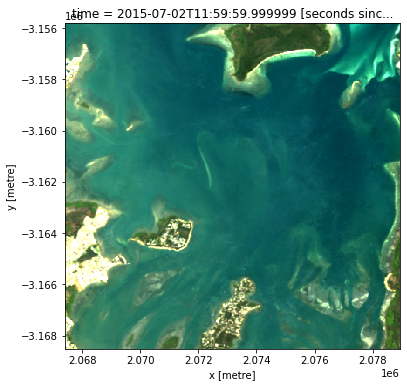

In [34]:
ds_rgb.isel(time=0).to_array().plot.imshow(robust=True, figsize=(6, 6))

#### When a product is re-projected to a different CRS and/or resolution, the new pixel grid may differ from the original input pixels by size, number and alignment. It is therefore necessary to apply a spatial "resampling" rule that allocates input pixel values into the new pixel grid.

#### By default, `dc.load()` resamples pixel values using "nearest neighbour" resampling, which allocates each new pixel with the value of the closest input pixel. Depending on the type of data and the analysis being run, this may not be the most appropriate choice (e.g. for continuous data).

#### The `resampling` parameter in `dc.load()` allows you to choose a custom resampling method from the following options: 

```
"nearest", "cubic", "bilinear", "cubic_spline", "lanczos", 
"average", "mode", "gauss", "max", "min", "med", "q1", "q3"
```

#### This example loads resampled data using the "average" resampling method:

In [ ]:
# Note the additional `resampling` parameter
ds_averageresampling = dc.load(product="ga_ls8c_nbart_gm_cyear_3",
                               x=(153.3, 153.4),
                               y=(-27.5, -27.6),
                               time=("2015-01-01", "2015-12-31"),
                               resolution=(-250, 250),
                               resampling="average")

print(ds_averageresampling)


#### When loading large amounts of data, it can be useful to view the progress of the data load. The `progress_cbk` parameter in `dc.load()` adds a progress bar that indicates how the load is progressing.

#### The example cell below loads 5 years of data (2013, 2014, 2015, 2016 and 2017) from the `ls8_nbart_geomedian_annual` product with a progress bar:

>Note: In this example we are using a dictionary to define the query parameters and passing this to the `load` function using the `**kwargs` mode.

In [35]:
query = {"x": (153.3, 153.4),
         "y": (-27.5, -27.6),
         "time": ("2013", "2017")}

ds_progress = dc.load(product="ga_ls8c_nbart_gm_cyear_3",
                      progress_cbk=with_ui_cbk(),
                      **query)

ds_progress

<xarray.Dataset>
Dimensions:      (time: 5, y: 424, x: 384)
Coordinates:
  * time         (time) datetime64[ns] 2013-07-02T11:59:59.999999 ... 2017-07...
  * y            (y) float64 -3.156e+06 -3.156e+06 ... -3.168e+06 -3.168e+06
  * x            (x) float64 2.067e+06 2.067e+06 ... 2.079e+06 2.079e+06
    spatial_ref  int32 3577
Data variables:
    blue         (time, y, x) int16 490 506 504 497 498 ... 350 351 311 296 292
    green        (time, y, x) int16 537 557 558 548 536 ... 526 531 450 392 391
    red          (time, y, x) int16 253 273 275 269 268 ... 407 402 351 337 340
    nir          (time, y, x) int16 93 106 104 100 108 ... 2889 2557 2344 2403
    swir1        (time, y, x) int16 51 61 62 58 68 ... 1394 1397 1127 1009 1089
    swir2        (time, y, x) int16 41 48 48 47 55 49 ... 661 650 521 465 495
    sdev         (time, y, x) float32 0.003682 0.004547 ... 0.001669 0.002302
    edev         (time, y, x) float32 142.1 160.1 159.9 ... 220.8 205.4 237.7
    bcdev        (time, y, x) float32 0.1025 0.1248 0.1216 ... 0.04438 0.05313
    count        (time, y, x) int16 10 11 11 11 12 11 11 ... 17 17 15 14 14 14
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

#### Exercise 2.7: Can you display an NDVI index for the image corresponding to year 2015 in the previous Dataset?

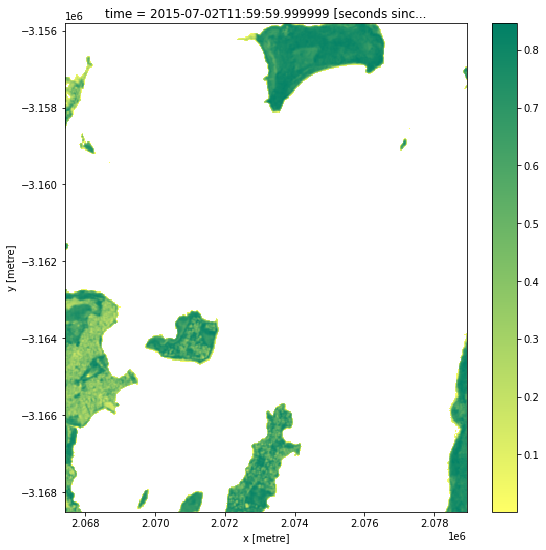

In [43]:
ds15 = ds_progress.isel(time = 2)
NDVI = (ds15['nir'] - ds15['red'])/(ds15['nir'] + ds15['red'])
NDVI.where(NDVI > 0).plot(cmap='summer_r', figsize=(9,9))

#### Disclaimer: The original notebook for this tutorial has been taken from the Sandbox `Beginners_guide` folder. Refer to the conditions specified in the original notebook and for updated versions of the code.